<a href="https://colab.research.google.com/github/oyyarko/deeplearning_rnn/blob/master/google_stock_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Loading the data from the drive

In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GOOG.csv', date_parser=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3919,2020-03-16,1096.000000,1152.266968,1074.439941,1084.329956,1084.329956,4252400
3920,2020-03-17,1093.109985,1130.859985,1056.010010,1119.800049,1119.800049,3861500
3921,2020-03-18,1056.510010,1106.500000,1037.280029,1096.800049,1096.800049,4233400
3922,2020-03-19,1093.050049,1157.969971,1060.108032,1115.290039,1115.290039,3651100
3923,2020-03-20,1135.719971,1143.989990,1065.489990,1072.319946,1072.319946,3600300


In [4]:
data_training = data[data['Date']<'2019-09-01'].copy()
data_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3780,2019-08-26,1157.260010,1169.469971,1152.959961,1168.890015,1168.890015,1226100
3781,2019-08-27,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
3782,2019-08-28,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
3783,2019-08-29,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
3784,2019-08-30,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800


In [5]:
data_testing = data[data['Date']>='2019-09-01'].copy()
data_testing.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3919,2020-03-16,1096.000000,1152.266968,1074.439941,1084.329956,1084.329956,4252400
3920,2020-03-17,1093.109985,1130.859985,1056.010010,1119.800049,1119.800049,3861500
3921,2020-03-18,1056.510010,1106.500000,1037.280029,1096.800049,1096.800049,4233400
3922,2020-03-19,1093.050049,1157.969971,1060.108032,1115.290039,1115.290039,3651100
3923,2020-03-20,1135.719971,1143.989990,1065.489990,1072.319946,1072.319946,3600300


Dropping unnecessary columns which has no uses in prediction

In [0]:
training = data_training.drop(['Date', 'Adj Close'], axis=1)

Converting data to Scaler

In [7]:
scaler = MinMaxScaler()
training = scaler.fit_transform(training)
training

array([[3.29485734e-04, 9.33053728e-04, 0.00000000e+00, 1.32809895e-04,
        5.43577404e-01],
       [7.40330113e-04, 2.95198254e-03, 1.85599897e-03, 3.34030536e-03,
        2.77885613e-01],
       [4.70232083e-03, 4.72156249e-03, 5.35132373e-03, 3.77897219e-03,
        2.22150736e-01],
       ...,
       [9.08303987e-01, 9.08888351e-01, 9.10549436e-01, 9.05830066e-01,
        9.62153596e-03],
       [9.24154215e-01, 9.24745103e-01, 9.30098110e-01, 9.23466705e-01,
        1.30916378e-02],
       [9.38346722e-01, 9.26715038e-01, 9.32299994e-01, 9.19629133e-01,
        1.35932517e-02]])

Splitting the data into Train and Test

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60, training.shape[0]):
    X_train.append(training[i-60:i])
    y_train.append(training[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(3725, 60, 5)

# Building RNN network 
## LSTM

In [0]:
regressior = Sequential()
regressior.add(LSTM(units=60, activation='relu', return_sequences=True,
                    input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=50, activation='relu', return_sequences=True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=80, activation='relu', return_sequences=True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units=120, activation='relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units=1))

In [13]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            22200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            41920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [0]:
regressior.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
regressior.fit(X_train, y_train, epochs=20, batch_size=32)

Train on 3725 samples
Epoch 1/20
3725/3725 [==============================] - 28s 7ms/sample - loss: 0.0116
Epoch 2/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0023
Epoch 3/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0019
Epoch 4/20
3725/3725 [==============================] - 24s 6ms/sample - loss: 0.0021
Epoch 5/20
3725/3725 [==============================] - 24s 6ms/sample - loss: 0.0017
Epoch 6/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0016
Epoch 7/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0017
Epoch 8/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0017
Epoch 9/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0014
Epoch 10/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0014
Epoch 11/20
3725/3725 [==============================] - 23s 6ms/sample - loss: 0.0016
Epoch 12/20
3725/3725 [=======

In [0]:
past_60_days = data_training.tail(60)

In [17]:
df = past_60_days.append(data_testing, ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,1050.630005,1070.920044,1048.400024,1066.040039,1802400
1,1072.979980,1092.660034,1072.322021,1080.380005,1464200
2,1093.979980,1101.989990,1077.603027,1078.719971,1436700
3,1078.000000,1080.930054,1067.540039,1077.030029,1061000
4,1083.640015,1094.170044,1080.150024,1088.770020,1057700
...,...,...,...,...,...
194,1096.000000,1152.266968,1074.439941,1084.329956,4252400
195,1093.109985,1130.859985,1056.010010,1119.800049,3861500
196,1056.510010,1106.500000,1037.280029,1096.800049,4233400
197,1093.050049,1157.969971,1060.108032,1115.290039,3651100


In [18]:
inputs = scaler.transform(df)
inputs

array([[0.81759613, 0.82371085, 0.82117681, 0.82101569, 0.02174266],
       [0.83584711, 0.84126306, 0.84080924, 0.8326011 , 0.01764493],
       [0.8529957 , 0.84879578, 0.84514328, 0.83125994, 0.01731174],
       [0.83994646, 0.83179263, 0.83688474, 0.82989462, 0.01275965],
       [0.84455209, 0.84248219, 0.84723356, 0.83937947, 0.01271967],
       [0.84682226, 0.8412872 , 0.8472516 , 0.83661638, 0.01337152],
       [0.84670793, 0.84652712, 0.85226437, 0.84239296, 0.01131297],
       [0.86582445, 0.86042193, 0.86269524, 0.85136074, 0.01670592],
       [0.86248459, 0.85284071, 0.85817326, 0.85033468, 0.01612555],
       [0.87423547, 0.8634334 , 0.86741418, 0.85767865, 0.01519502],
       [0.86545702, 0.8666548 , 0.87015524, 0.86612936, 0.02350194],
       [0.87392516, 0.86495126, 0.87255989, 0.86099106, 0.01681376],
       [0.86824983, 0.85877486, 0.85022908, 0.83742429, 0.01864695],
       [0.84688755, 0.84151329, 0.84074192, 0.83213254, 0.02184565],
       [0.84484606, 0.83677404, 0.

In [0]:
X_test = []
y_test = []

In [0]:
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [21]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((139, 60, 5), (139,))

In [0]:
y_pred = regressior.predict(X_test)

In [23]:
scaler.scale_

array([8.16599709e-04, 8.07369682e-04, 8.20685063e-04, 8.07909963e-04,
       1.21162775e-08])

In [24]:
scale = 1/8.16599709e-04
scale

1224.5901988191868

In [0]:
y_pred = y_pred*scale
y_test = y_test*scale

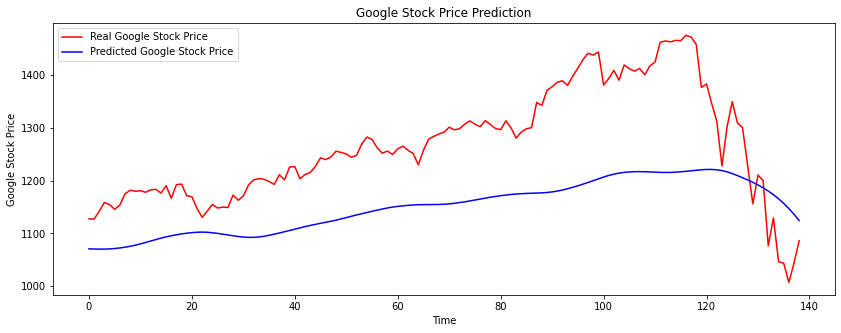

In [26]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()